# BAIS:3250 - Final Project
### Perform Analysis on the Wealth and Health of Countries

**Author(s):** Natalie Brown, Max Kaiser

**Date Modified:** 12-14-2024 (*date created:* 12-13-2024)


**Description:** Perform analysis on Country Data by answering questions in the following areas:

**1) Health**: top 10 highest and lowest...
- life expectancy
- infant mortality
- covid death rate
- physicians per thousand
- birth rate

**2) Wealth**: top 10 highest and lowest...
- GDP
- unemployment rate
- tax revenue pct
- primary and secondary education enrollment rate

**3) Correlation of Country Indicators**

- Correlation matrix heatmap
- Run correlation tests on features that seem to be highly correlated

**4) Health and Wealth of the World**

- heatmaps of country by different features
- heatmaps of continents by different features (average _____ by continent)
---

### Import Libaries
* **pandas:** for data frames
* **seaborn** and **matplotlib:** for visualizations
* **scipy.stats - pearsonr:** for pearson correlation test
* **geopandas** for world heatmap

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import geopandas as gpd

---
### Load Data
* **07_country_final.csv**

In [5]:
# load
country_df=pd.read_csv('07_country_final.csv',sep=',',encoding='utf-8')

# review
country_df.head()

,country,population,lat,long,continent,gross_domestic_product_usd(b),tax_revenue_pct,unemployment_rt,primary_education_enrollment_pct,secondary_education_enrollment_pct,life_expectancy,birth_rt,infant_mortality_rt,physicians_per_thousand,covid_death_rt
0,Afghanistan,38673974,33.939110,67.709953,Asia,19.1014,9.3,11.12,104.0,9.7,64.5,32.49,47.9,0.28,3.82
1,Albania,2865340,41.153332,20.168331,Europe,15.2781,18.6,12.33,107.0,55.0,78.5,11.78,7.8,1.20,2.12
2,Algeria,43621542,28.033886,1.659626,Africa,169.9882,37.2,11.70,109.9,51.4,76.7,24.28,20.1,1.72,2.92
3,Andorra,77230,42.506285,1.521801,Europe,3.1541,69.0,3.70,106.4,97.5,83.8,7.20,2.7,3.33,1.13
4,Angola,32569069,-11.202692,17.873887,Africa,94.6354,9.2,6.89,113.5,9.3,60.8,40.73,51.6,0.21,2.30


In [6]:
# rename gross domestic product to gdp
country_df=country_df.rename(columns={'gross_domestic_product_usd(b)':'GDP'})

---
### Define Functions

In [8]:
# function to sort dataframe
def sort_df(col,ascending):
    df=country_df.sort_values(by=col,ascending=ascending).reset_index(drop=True)
    return df

# scatter plot
def scatter_plot(x,y,title):
    # create figure
    plt.figure(figsize=(10,6))
    
    # create scatter plot with trend line
    sns.regplot(data=country_df,x=x,y=y,
                scatter_kws=({
        'edgecolor':None,
        'alpha':0.5}),
                ci=None,
                line_kws={'color':'red'}
               )
    
    # title
    plt.title(title)
    
    # display
    plt.show()

# pearson correlation
def pearson_correlation(x,y):
    # calculate Pearson correlation between 'CreditScore' and 'HomeAge'
    pearson_corr=country_df[x].corr(country_df[y], method="pearson")
    
    # display the result
    print(f'Test for Correlation betwen {x} and {y}\n{'-'*30}\n')
    print(f"Pearson Correlation: {pearson_corr:.2f}\n")
    
    # interpretation
    if abs(pearson_corr) < 0.3:
        print("Interpretation: No or weak linear correlation.")
    elif 0.3 <= abs(pearson_corr) < 0.7:
        print("Interpretation: Moderate linear correlation.")
    else:
        print("Interpretation: Strong linear correlation.")


    print(f'\n\nTest for Statistically Significant Correlation\n{'-'*30}')
    # perform the Pearson correlation test
    corr_stat,p_value=pearsonr(country_df[x],country_df[y])
    
    # display the correlation statistic and p-value
    print(f"\nPearson Correlation Coefficient: {corr_stat:.2f}")
    print(f"P-value: {p_value:.4f}\n")
    
    # interpretation based on p-value, significance level
    alpha=0.05  # significance level
    
    if p_value > alpha:
        print(f"Fail to reject H0: No significant correlation between {x} and {y} (correlation = 0).")
    else:
        print(f"Reject H0: Significant correlation exists between {x} and {y} (correlation != 0).")


    

---

# Health

- life expectancy
- infant mortality
- covid death rate
- physicians per thousand
- birth rate

In [10]:
# for display 
str='Top 10 Countries with'

---
#### Life Expectancy

In [12]:
# top 5 countries by life expectancy
life_expectancy=sort_df('life_expectancy',False)

# display
print(f'{str} Highest Life Expectancy\n')
life_expectancy[['country','life_expectancy','continent']].head(10)

Top 10 Countries with Highest Life Expectancy



,country,life_expectancy,continent
0,Monaco,89.8,Europe
1,San Marino,85.4,Europe
2,Japan,84.2,Asia
3,Andorra,83.8,Europe
4,Switzerland,83.6,Europe
5,Spain,83.3,Europe
6,Singapore,83.1,Asia
7,Liechtenstein,83.0,Europe
8,Italy,82.9,Europe
9,Israel,82.8,Asia


In [13]:
# bottom 5 by life expectancy
print(f'{str} Lowest Life Expectancy\n')
life_expectancy[['country','life_expectancy','continent']].tail(10)

Top 10 Countries with Lowest Life Expectancy



,country,life_expectancy,continent
182,Equatorial Guinea,58.4,Africa
183,Guinea-Bissau,58.0,Africa
184,South Sudan,57.6,Africa
185,Ivory Coast,57.4,Africa
186,Somalia,57.1,Africa
187,Nigeria,54.3,Africa
188,Sierra Leone,54.3,Africa
189,Chad,54.0,Africa
190,Lesotho,53.7,South America
191,Central African Republic,52.8,Africa


---
#### Infant Mortality

In [15]:
# top countries with lowest infant mortality
infant_mortality=sort_df('infant_mortality_rt',False)

print(f'{str} Lowest Infant Mortality\n')
infant_mortality[['country','infant_mortality_rt','continent']].tail(10)

Top 10 Countries with Lowest Infant Mortality



,country,infant_mortality_rt,continent
182,Sweden,2.2,Europe
183,Estonia,2.1,Europe
184,Norway,2.1,Europe
185,Luxembourg,1.9,Europe
186,Cyprus,1.9,Europe
187,Japan,1.8,Asia
188,Slovenia,1.7,Europe
189,San Marino,1.7,Europe
190,Iceland,1.5,Europe
191,Finland,1.4,Europe


In [16]:
# bottom countries
print(f'{str} Highest Infant Mortality')
infant_mortality[['country','infant_mortality_rt','continent']].head(10)

Top 10 Countries with Highest Infant Mortality


,country,infant_mortality_rt,continent
0,Central African Republic,84.5,Africa
1,Sierra Leone,78.5,Africa
2,Somalia,76.6,Africa
3,Nigeria,75.7,Africa
4,Chad,71.4,Africa
5,Congo,68.2,Africa
6,Lesotho,65.7,South America
7,Guinea,64.9,Africa
8,South Sudan,63.7,Africa
9,Equatorial Guinea,62.6,Africa


---
#### Covid Death Rate

In [18]:
covid_death_rt=sort_df('covid_death_rt',False)

print(f'{str} Highest Covid Death Rate')
covid_death_rt[['country','covid_death_rt','continent']].head(10)

Top 10 Countries with Highest Covid Death Rate


,country,covid_death_rt,continent
0,Yemen,29.12,Asia
1,Mexico,9.54,North America
2,Sudan,7.01,Africa
3,Ecuador,6.99,South America
4,Chad,5.98,Africa
5,Egypt,5.74,Africa
6,Liberia,5.19,Africa
7,China,5.08,Asia
8,Fiji,4.76,Oceana
9,Niger,4.65,Africa


In [19]:
# excluding countries with death rate of 0
print(f'{str} Lowest Covid Death Rate')
covid_death_rt[covid_death_rt['covid_death_rt'] > 0][['country','covid_death_rt','continent']].tail(10)

Top 10 Countries with Lowest Covid Death Rate


,country,covid_death_rt,continent
143,Cyprus,0.46,Europe
144,Bahrain,0.39,Asia
145,Maldives,0.35,Asia
146,United Arab Emirates,0.34,Asia
147,Botswana,0.31,Africa
148,Netherlands,0.28,Europe
149,Qatar,0.17,Asia
150,Burundi,0.15,Africa
151,South Korea,0.14,Asia
152,Singapore,0.05,Asia


---
#### Physicians per Thousand

In [21]:
physicians=sort_df('physicians_per_thousand',False)

print(f'{str} the Most Physicians per Thousand')
physicians[['country','physicians_per_thousand','continent']].head(10)

Top 10 Countries with the Most Physicians per Thousand


,country,physicians_per_thousand,continent
0,Cuba,8.42,North America
1,Georgia,7.12,Europe
2,Monaco,6.56,Europe
3,Lithuania,6.35,Europe
4,San Marino,6.11,Europe
5,Greece,5.48,Europe
6,Belarus,5.19,Europe
7,Austria,5.17,Europe
8,Portugal,5.12,Europe
9,Uruguay,5.05,South America


In [22]:
print(f'{str} the Least Physicians per Thousand')
physicians[['country','physicians_per_thousand','continent']].tail(10)

Top 10 Countries with the Least Physicians per Thousand


,country,physicians_per_thousand,continent
182,Eritrea,0.06,Africa
183,Sao Tome and Principe,0.05,Africa
184,Chad,0.04,Africa
185,Liberia,0.04,Africa
186,Niger,0.04,Africa
187,Malawi,0.04,Africa
188,South Sudan,0.04,Africa
189,Sierra Leone,0.03,Africa
190,Somalia,0.02,Africa
191,Tanzania,0.01,Africa


---
#### Birth Rate

In [24]:
birth_rate=sort_df('birth_rt',False)
print(f'{str} Highest Birth Rate')
birth_rate[['country','birth_rt','continent']].head(10)

Top 10 Countries with Highest Birth Rate


,country,birth_rt,continent
0,Niger,46.08,Africa
1,Chad,42.17,Africa
2,Somalia,41.75,Africa
3,Mali,41.54,Africa
4,Congo,41.18,Africa
5,Angola,40.73,Africa
6,Burundi,39.01,Africa
7,Gambia,38.54,Africa
8,Uganda,38.14,Africa
9,Burkina Faso,37.93,Africa


In [25]:
birth_rate[['country','birth_rt','continent']].tail(10)

,country,birth_rt,continent
182,Portugal,8.50,Europe
183,Bosnia and Herzegovina,8.11,Europe
184,Greece,8.10,Europe
185,Spain,7.90,Europe
186,Japan,7.40,Asia
187,Italy,7.30,Europe
188,Andorra,7.20,Europe
189,San Marino,6.80,Europe
190,South Korea,6.40,Asia
191,Monaco,5.90,Europe


---
# Wealth

- GDP
- unemployment rate
- tax revenue pct
- primary and secondary education enrollment rate


---
#### GDP

In [28]:
gdp=sort_df('GDP',False)

print(f'{str} Highest GDP')
gdp[['country','GDP','continent']].head(10)

Top 10 Countries with Highest GDP


,country,GDP,continent
0,United States,21427.7000,North America
1,China,19910.0000,Asia
2,Japan,5081.7695,Asia
3,Germany,3845.6300,Europe
4,United Kingdom,2827.1132,Europe
5,France,2715.5183,Europe
6,India,2611.0000,Asia
7,South Korea,2029.0000,Asia
8,Italy,2001.2444,Europe
9,Brazil,1839.7580,South America


In [29]:
print(f'{str} Lowest GDP')
gdp[['country','GDP','continent']].tail(10)

Top 10 Countries with Lowest GDP


,country,GDP,continent
182,Saint Vincent and the Grenadines,0.8254,North America
183,Dominica,0.5960,North America
184,Tonga,0.4504,Oceana
185,Sao Tome and Principe,0.4290,Africa
186,Micronesia,0.4019,Oceana
187,Palau,0.2840,Oceana
188,Marshall Islands,0.2213,Oceana
189,Kiribati,0.1946,Oceana
190,Nauru,0.1330,Oceana
191,Tuvalu,0.0473,Oceana


---

#### Unemployment Rate

In [31]:
unemployment=sort_df('unemployment_rt',False)

print(f'{str} Lowest Unemployment Rate')
unemployment[['country','unemployment_rt','continent']].tail(10)

Top 10 Countries with Lowest Unemployment Rate


,country,unemployment_rt,continent
182,Nepal,1.41,Asia
183,Tonga,1.12,Oceana
184,Rwanda,1.03,Africa
185,Thailand,0.75,Asia
186,Bahrain,0.71,Asia
187,Cambodia,0.68,Asia
188,Laos,0.63,Asia
189,Solomon Islands,0.58,Oceana
190,Niger,0.47,Africa
191,Qatar,0.09,Asia


In [32]:
print(f'{str} Highest Unemployment Rate')
unemployment[['country','unemployment_rt','continent']].head(10)

Top 10 Countries with Highest Unemployment Rate


,country,unemployment_rt,continent
0,Eswatini,37.64,Africa
1,South Africa,28.18,Africa
2,Grenada,24.00,North America
3,Lesotho,23.41,South America
4,Saint Lucia,20.71,North America
5,Namibia,20.27,Africa
6,Gabon,20.00,Africa
7,Saint Vincent and the Grenadines,18.88,North America
8,Libya,18.56,Africa
9,Bosnia and Herzegovina,18.42,Europe


---

#### Tax Revenue Percentage

In [34]:
tax=sort_df('tax_revenue_pct',False)

print(f'{str} Highest Tax Revenue Percentage')
tax[['country','tax_revenue_pct','continent']].head(10)

Top 10 Countries with Highest Tax Revenue Percentage


,country,tax_revenue_pct,continent
0,Andorra,69.0,Europe
1,Cuba,58.1,North America
2,Liechtenstein,52.3,Europe
3,Libya,51.6,Africa
4,Nauru,44.3,Oceana
5,Algeria,37.2,Africa
6,Montenegro,37.2,Europe
7,Eritrea,34.9,Africa
8,Seychelles,34.1,Africa
9,Denmark,32.4,Europe


In [35]:
print(f'{str} Lowest Tax Revenue Percentage')
tax[['country','tax_revenue_pct','continent']].tail(10)

Top 10 Countries with Lowest Tax Revenue Percentage


,country,tax_revenue_pct,continent
182,Myanmar,5.4,Asia
183,Bahrain,4.2,Asia
184,Oman,2.5,Asia
185,Iraq,2.0,Asia
186,Nigeria,1.5,Africa
187,Kuwait,1.4,Asia
188,United Arab Emirates,0.1,Asia
189,North Korea,0.0,Asia
190,Mozambique,0.0,Africa
191,Somalia,0.0,Africa


---

#### Primary Education Enrollment Percentage

In [37]:
prim_education=sort_df('primary_education_enrollment_pct',False)

print(f'{str} Highest Primary Education Enrollment Percentage')
prim_education[['country','primary_education_enrollment_pct','continent']].head(10)

Top 10 Countries with Highest Primary Education Enrollment Percentage


,country,primary_education_enrollment_pct,continent
0,Malawi,142.5,Africa
1,Madagascar,142.5,Africa
2,Nepal,142.1,Asia
3,Gabon,139.9,Africa
4,Rwanda,133.0,Africa
5,Sweden,126.6,Europe
6,Namibia,124.2,Africa
7,Togo,123.8,Africa
8,Benin,122.0,Africa
9,Burundi,121.4,Africa


In [38]:
print(f'{str} Lowest Enrollment Percentage')
prim_education[['country','primary_education_enrollment_pct','continent']].tail(10)

Top 10 Countries with Lowest Enrollment Percentage


,country,primary_education_enrollment_pct,continent
182,Bahamas,81.4,The Caribean
183,Senegal,81.0,Africa
184,Sudan,76.8,Africa
185,Mali,75.6,Africa
186,Djibouti,75.3,Africa
187,Niger,74.7,Africa
188,South Sudan,73.0,Africa
189,Eritrea,68.4,Africa
190,Equatorial Guinea,61.8,Africa
191,Somalia,23.4,Africa


---

#### Secondary Education Enrollment Rate

In [40]:
secondary_education=sort_df('secondary_education_enrollment_pct',False)

print(f'{str} Highest Secondary Education Enrollment Percentage')
secondary_education[['country','secondary_education_enrollment_pct','continent']].head(10)

Top 10 Countries with Highest Secondary Education Enrollment Percentage


,country,secondary_education_enrollment_pct,continent
0,Monaco,154.2,Europe
1,Greece,136.6,Europe
2,Australia,113.1,Australia
3,Grenada,104.6,North America
4,Andorra,97.5,Europe
5,South Korea,94.3,Asia
6,Bolivia,91.5,South America
7,Tuvalu,91.3,Oceana
8,Argentina,90.0,South America
9,Spain,88.9,Europe


In [41]:
print(f'{str} Lowest Secondary Education Enrollment Percentage')
secondary_education[['country','secondary_education_enrollment_pct','continent']].tail(10)

Top 10 Countries with Lowest Secondary Education Enrollment Percentage


,country,secondary_education_enrollment_pct,continent
182,Chad,3.3,Africa
183,Central African Republic,3.0,Africa
184,Gambia,2.7,Africa
185,Guinea-Bissau,2.6,Africa
186,Somalia,2.5,Africa
187,Sierra Leone,2.0,Africa
188,Equatorial Guinea,1.9,Africa
189,Papua New Guinea,1.8,Oceana
190,Haiti,1.1,North America
191,Malawi,0.8,Africa


---
## Correlation of Country Indicators

* **Features that may have linear correlation**
    * **health**
        * **life expectancy - birth rt:** strong correlation 
        * **life expectancy - infant mortality rt**: strong correlation
        * **life expectancy - physicians per thousand**: strong correlation
    * **wealth** no features seem to have correlation
    * **health and wealth**
        * **physicians per thousand - secondary education enrollment pct:** moderate correlation
        * **life expectancy - secondary education enrollment pct:** moderate correlation
        * **birth rt - secondary education enrollment pct:** moderate correlation 
        * **infant mortality rt - secondary education enrollment pct:** moderate correlation

In [43]:
# list with numeric features
numeric_features=['GDP', 'tax_revenue_pct', 'unemployment_rt',
       'primary_education_enrollment_pct',
       'secondary_education_enrollment_pct', 'life_expectancy', 'birth_rt',
       'infant_mortality_rt', 'physicians_per_thousand', 'covid_death_rt']

# correlation df
corr_df=country_df[numeric_features].corr()

# display
corr_df

,GDP,tax_revenue_pct,unemployment_rt,primary_education_enrollment_pct,secondary_education_enrollment_pct,life_expectancy,birth_rt,infant_mortality_rt,physicians_per_thousand,covid_death_rt
GDP,1.000000,-0.101888,0.017525,-0.000436,0.179358,0.169254,-0.181559,-0.151179,0.093498,0.038903
tax_revenue_pct,-0.101888,1.000000,0.151952,0.088349,0.271718,0.308829,-0.324727,-0.344661,0.287243,-0.115769
unemployment_rt,0.017525,0.151952,1.000000,-0.075902,0.082046,-0.086442,-0.024112,0.031159,-0.043382,0.089718
primary_education_enrollment_pct,-0.000436,0.088349,-0.075902,1.000000,-0.023446,0.096440,-0.071974,-0.133540,-0.013012,-0.088997
secondary_education_enrollment_pct,0.179358,0.271718,0.082046,-0.023446,1.000000,0.680487,-0.689742,-0.669294,0.678051,-0.123223
life_expectancy,0.169254,0.308829,-0.086442,0.096440,0.680487,1.000000,-0.871926,-0.915647,0.717846,-0.095921
birth_rt,-0.181559,-0.324727,-0.024112,-0.071974,-0.689742,-0.871926,1.000000,0.866182,-0.740632,0.144310
infant_mortality_rt,-0.151179,-0.344661,0.031159,-0.133540,-0.669294,-0.915647,0.866182,1.000000,-0.692142,0.142770
physicians_per_thousand,0.093498,0.287243,-0.043382,-0.013012,0.678051,0.717846,-0.740632,-0.692142,1.000000,-0.099798
covid_death_rt,0.038903,-0.115769,0.089718,-0.088997,-0.123223,-0.095921,0.144310,0.142770,-0.099798,1.000000


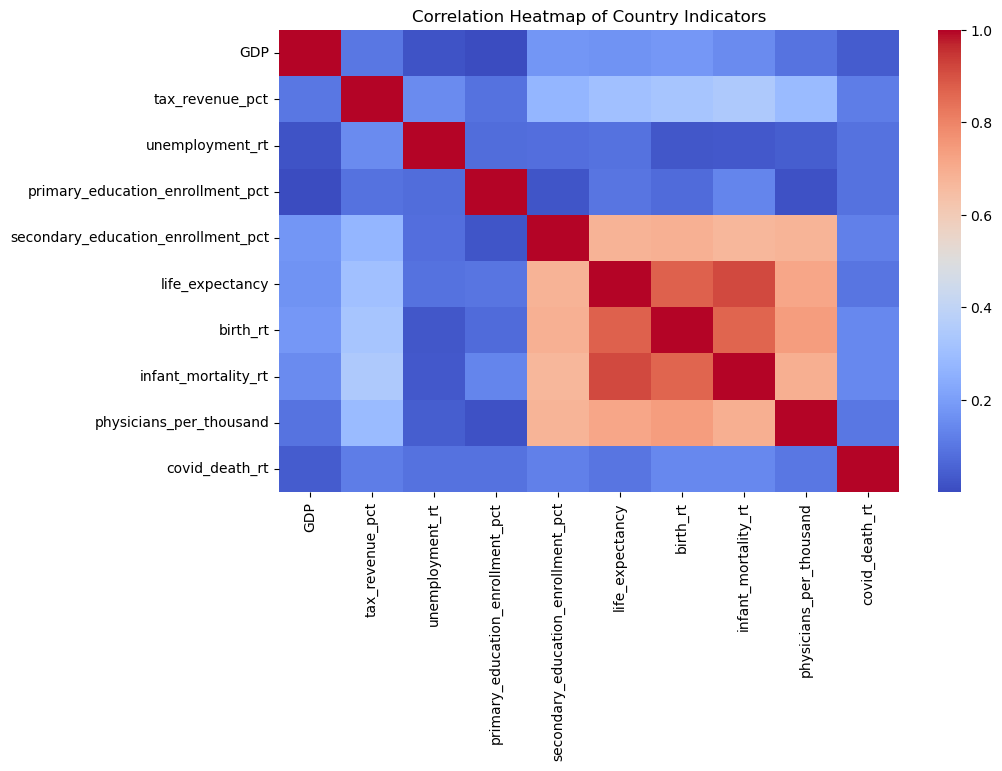

In [44]:
# heatmap
plt.figure(figsize=(10,6))

sns.heatmap(abs(corr_df),cmap='coolwarm')

plt.title('Correlation Heatmap of Country Indicators')

plt.show()

---

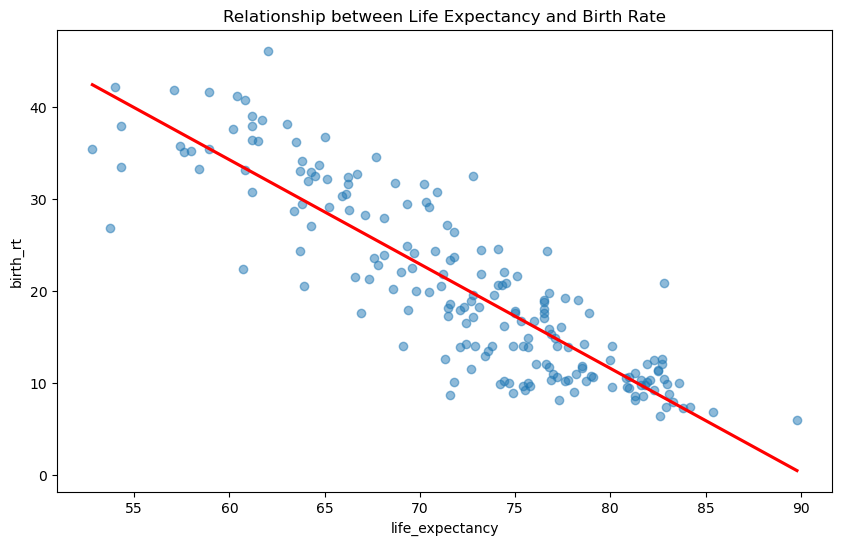

In [46]:
# life expectancy and birth rate
scatter_plot('life_expectancy','birth_rt','Relationship between Life Expectancy and Birth Rate')

In [47]:
pearson_correlation('life_expectancy','birth_rt')

Test for Correlation betwen life_expectancy and birth_rt
------------------------------

Pearson Correlation: -0.87

Interpretation: Strong linear correlation.


Test for Statistically Significant Correlation
------------------------------

Pearson Correlation Coefficient: -0.87
P-value: 0.0000

Reject H0: Significant correlation exists between life_expectancy and birth_rt (correlation != 0).


---

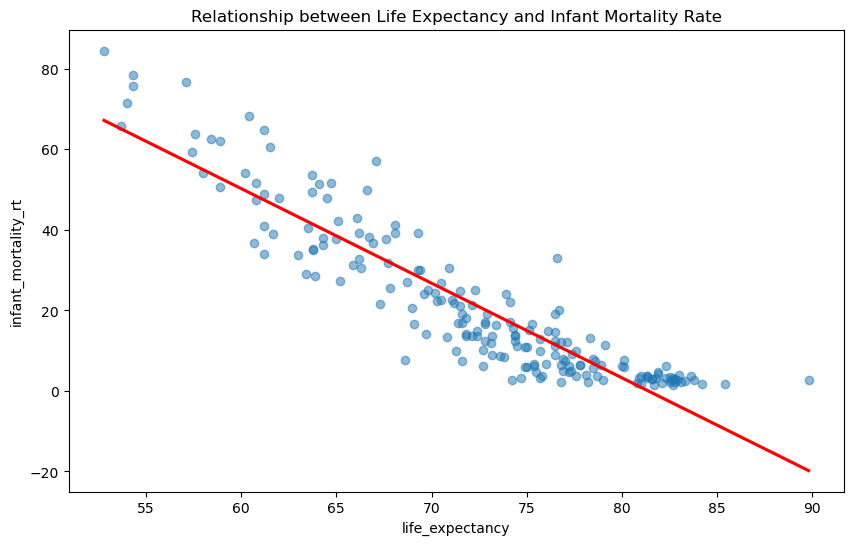

In [49]:
scatter_plot('life_expectancy','infant_mortality_rt','Relationship between Life Expectancy and Infant Mortality Rate')

In [50]:
pearson_correlation('life_expectancy','infant_mortality_rt')

Test for Correlation betwen life_expectancy and infant_mortality_rt
------------------------------

Pearson Correlation: -0.92

Interpretation: Strong linear correlation.


Test for Statistically Significant Correlation
------------------------------

Pearson Correlation Coefficient: -0.92
P-value: 0.0000

Reject H0: Significant correlation exists between life_expectancy and infant_mortality_rt (correlation != 0).


---

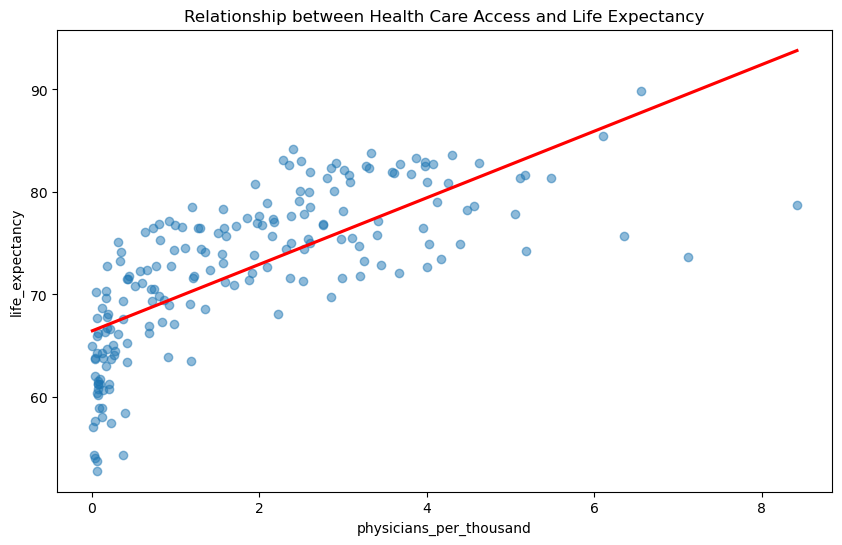

In [52]:
scatter_plot('physicians_per_thousand','life_expectancy','Relationship between Health Care Access and Life Expectancy')

In [53]:
pearson_correlation('physicians_per_thousand','life_expectancy')

Test for Correlation betwen physicians_per_thousand and life_expectancy
------------------------------

Pearson Correlation: 0.72

Interpretation: Strong linear correlation.


Test for Statistically Significant Correlation
------------------------------

Pearson Correlation Coefficient: 0.72
P-value: 0.0000

Reject H0: Significant correlation exists between physicians_per_thousand and life_expectancy (correlation != 0).


---

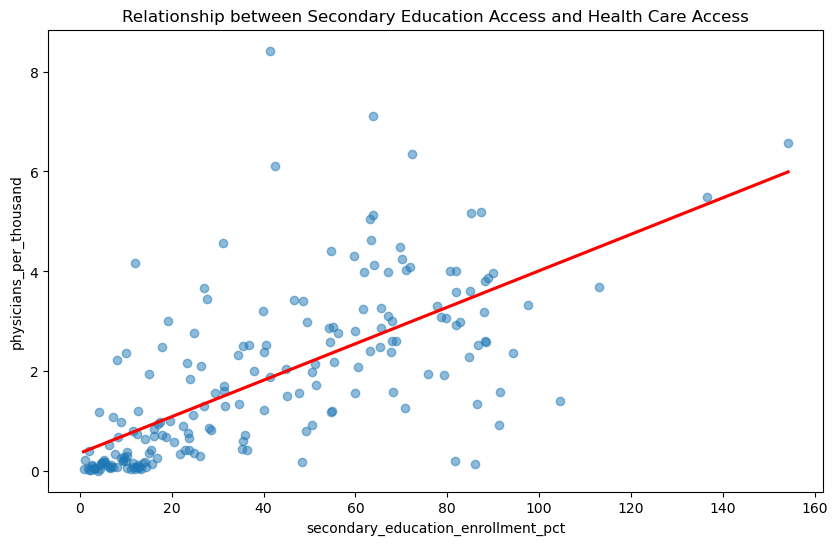

In [55]:
scatter_plot('secondary_education_enrollment_pct','physicians_per_thousand','Relationship between Secondary Education Access and Health Care Access')

In [56]:
pearson_correlation('secondary_education_enrollment_pct','physicians_per_thousand')

Test for Correlation betwen secondary_education_enrollment_pct and physicians_per_thousand
------------------------------

Pearson Correlation: 0.68

Interpretation: Moderate linear correlation.


Test for Statistically Significant Correlation
------------------------------

Pearson Correlation Coefficient: 0.68
P-value: 0.0000

Reject H0: Significant correlation exists between secondary_education_enrollment_pct and physicians_per_thousand (correlation != 0).


---

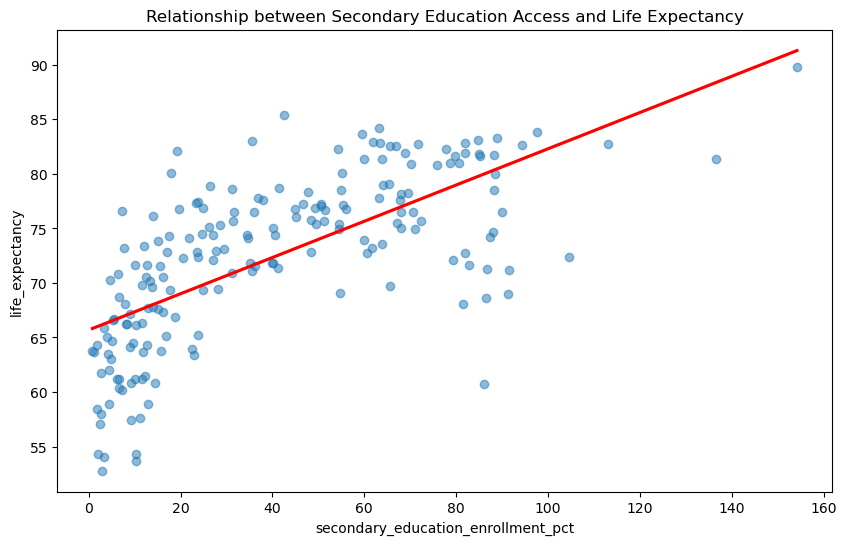

In [58]:
scatter_plot('secondary_education_enrollment_pct','life_expectancy','Relationship between Secondary Education Access and Life Expectancy')

In [59]:
pearson_correlation('secondary_education_enrollment_pct','life_expectancy')

Test for Correlation betwen secondary_education_enrollment_pct and life_expectancy
------------------------------

Pearson Correlation: 0.68

Interpretation: Moderate linear correlation.


Test for Statistically Significant Correlation
------------------------------

Pearson Correlation Coefficient: 0.68
P-value: 0.0000

Reject H0: Significant correlation exists between secondary_education_enrollment_pct and life_expectancy (correlation != 0).


---

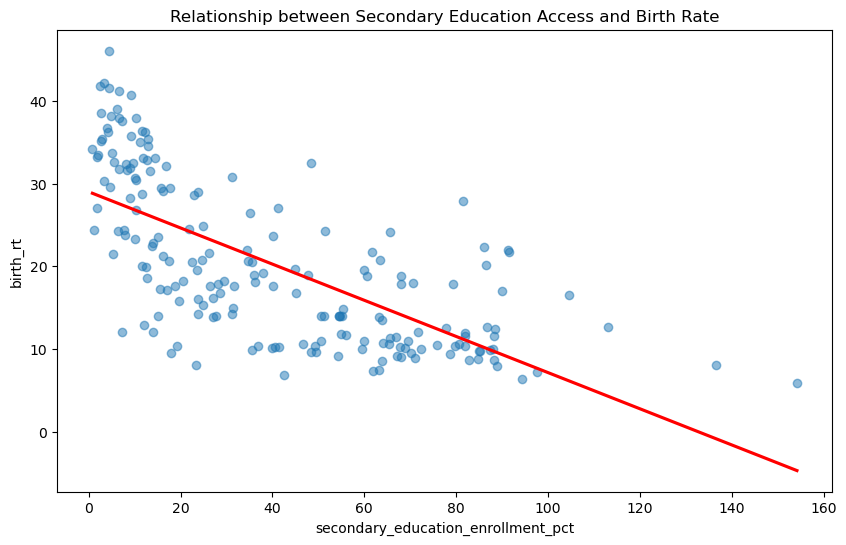

In [61]:
scatter_plot('secondary_education_enrollment_pct','birth_rt','Relationship between Secondary Education Access and Birth Rate')

In [62]:
pearson_correlation('secondary_education_enrollment_pct','birth_rt')

Test for Correlation betwen secondary_education_enrollment_pct and birth_rt
------------------------------

Pearson Correlation: -0.69

Interpretation: Moderate linear correlation.


Test for Statistically Significant Correlation
------------------------------

Pearson Correlation Coefficient: -0.69
P-value: 0.0000

Reject H0: Significant correlation exists between secondary_education_enrollment_pct and birth_rt (correlation != 0).


---

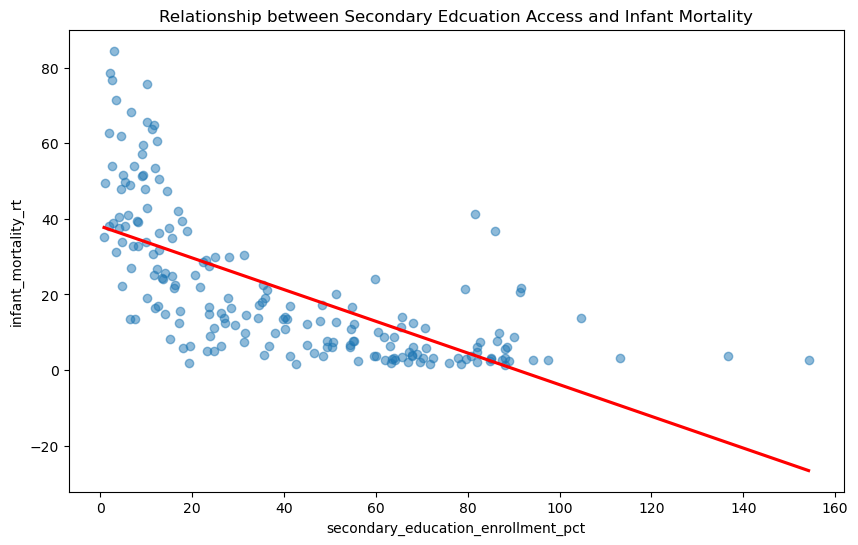

In [64]:
scatter_plot('secondary_education_enrollment_pct','infant_mortality_rt','Relationship between Secondary Edcuation Access and Infant Mortality')

In [65]:
pearson_correlation('secondary_education_enrollment_pct','infant_mortality_rt')

Test for Correlation betwen secondary_education_enrollment_pct and infant_mortality_rt
------------------------------

Pearson Correlation: -0.67

Interpretation: Moderate linear correlation.


Test for Statistically Significant Correlation
------------------------------

Pearson Correlation Coefficient: -0.67
P-value: 0.0000

Reject H0: Significant correlation exists between secondary_education_enrollment_pct and infant_mortality_rt (correlation != 0).


---
## Are certain areas of the world more wealthy than others?

In [67]:
# name map to match to the boundaries
name_mapping = {
    'United States': 'United States of America',
    'Ivory Coast': "Côte d'Ivoire",
    'Central African Republic': 'Central African Rep.',
    'South Sudan': 'S. Sudan',
    'Equatorial Guinea':'Eq Guinea'
}

    
    

# map the country name to match
country_edited_df=country_df.copy()
country_edited_df['country']=country_edited_df['country'].replace(name_mapping)

congo_row=country_edited_df[country_edited_df['country']=='Congo']

# Create a copy of the Congo row and rename the country
dr_congo_row = congo_row.copy()
dr_congo_row['country'] = 'Dem. Rep. Congo'

# Append the new row to the DataFrame
country_edited_df = pd.concat([country_edited_df,dr_congo_row], ignore_index=True)

In [68]:
# function for world map
def world_map(col,col_name,color):
    world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

    # Merge the shapefile with the data
    world = world.merge(country_edited_df, how='left', left_on='NAME', right_on='country')
    
    # Plotting the map with assigned colors
    fig, ax = plt.subplots(1, 1, figsize=(20,10))
    
    # Set the background color of the figure and axes 
    ax.set_facecolor('silver')
    world.boundary.plot(ax=ax, color='silver')
    
    world.plot(column=col, ax=ax, legend=True, cmap=color,missing_kwds={"color": "silver"})
    
    ax.set_ylim(-60, 90)
    
    # Adding a title
    plt.title(f'World Heatmap by {col_name}',fontsize=14)
    
    # Show the plot
    plt.show()

# function for grouping by continent
def group_continent(col,round_to):
    # finding average gdp by continent
    df=country_df.groupby('continent')[col].mean().reset_index()

    # round
    df[col]=round(df[col],round_to)



    # display
    return df.sort_values(by=col,ascending=False)

# function for world map
def continent_map(col,col_name,color,df):
    world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

    # Merge the shapefile with the data
    world = world.merge(df, how='left', left_on='CONTINENT', right_on='continent')
    
    # Plotting the map with assigned colors
    fig, ax = plt.subplots(1, 1, figsize=(20,10))
    
    # Set the background color of the figure and axes 
    ax.set_facecolor('silver')
    world.boundary.plot(ax=ax, color='silver')
    
    world.plot(column=col, ax=ax, legend=True, cmap=color,missing_kwds={"color": "silver"})

    ax.set_ylim(-60, 90)
    
    # Adding a title
    plt.title(f'World Heatmap by Continent Avg {col_name}',fontsize=14)
    
    # Show the plot
    plt.show()

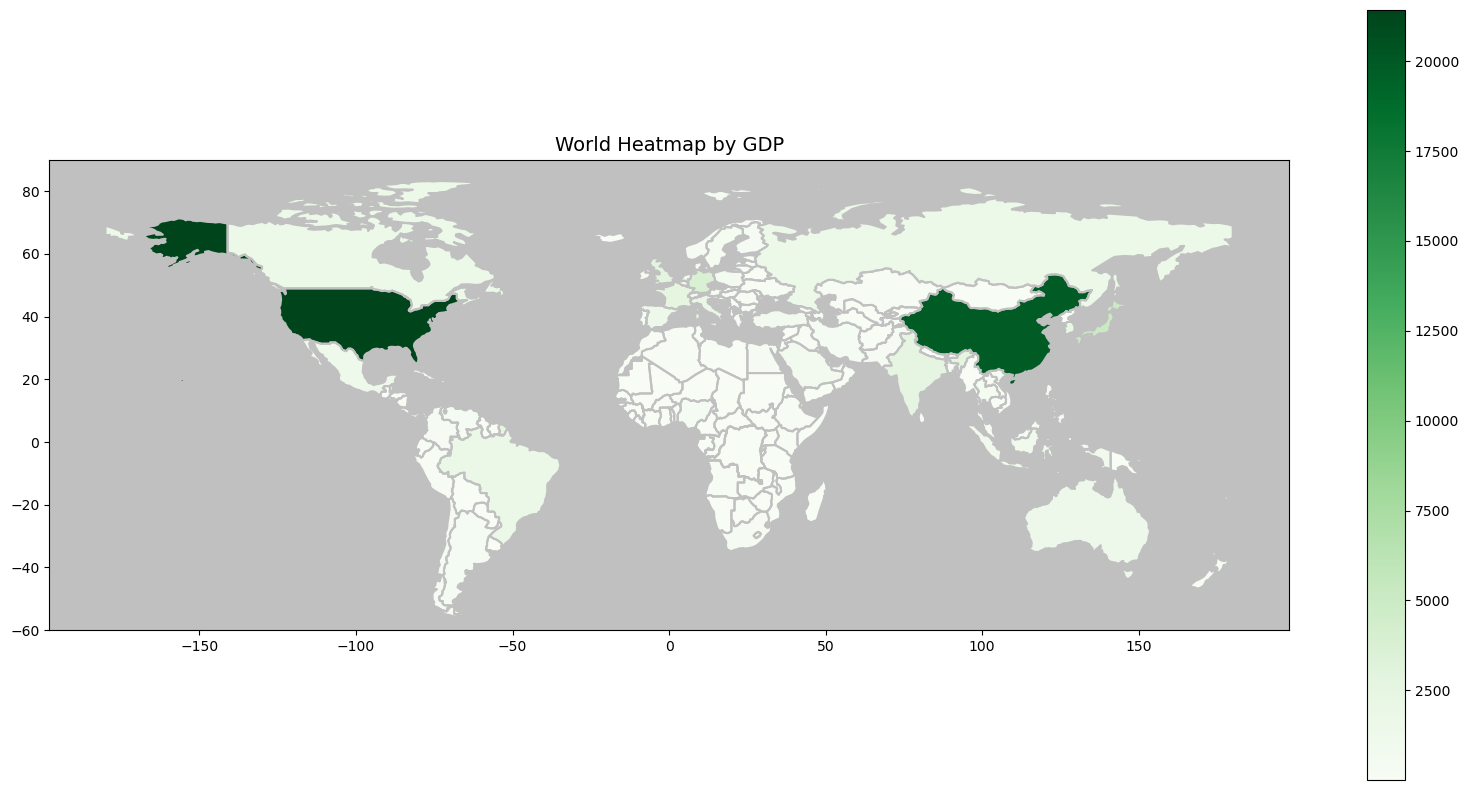

In [69]:
world_map('GDP','GDP','Greens')

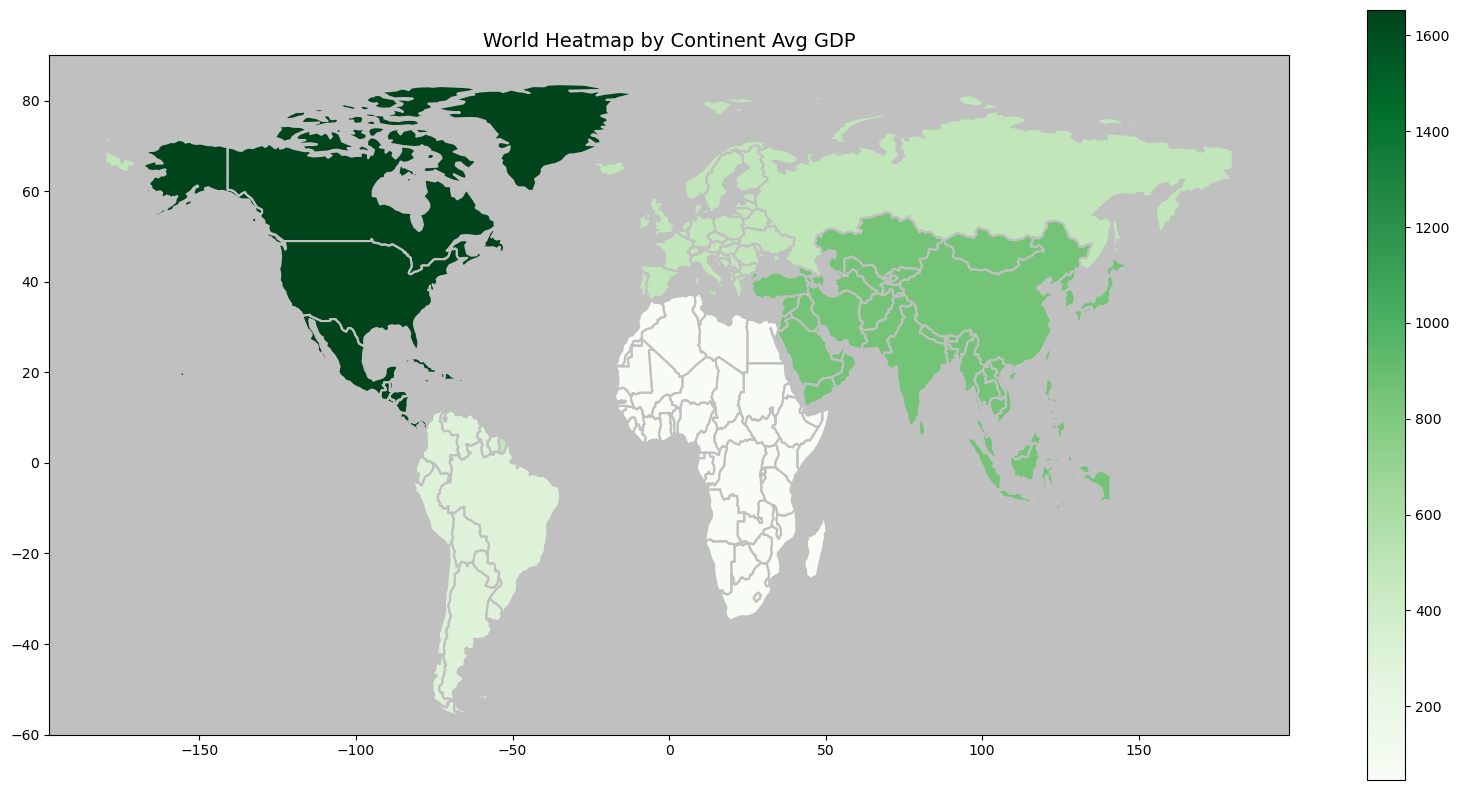

In [70]:
continent_map('GDP','GDP','Greens',group_continent('GDP',2))

---
## Do certain areas of the world have better life expectancy?

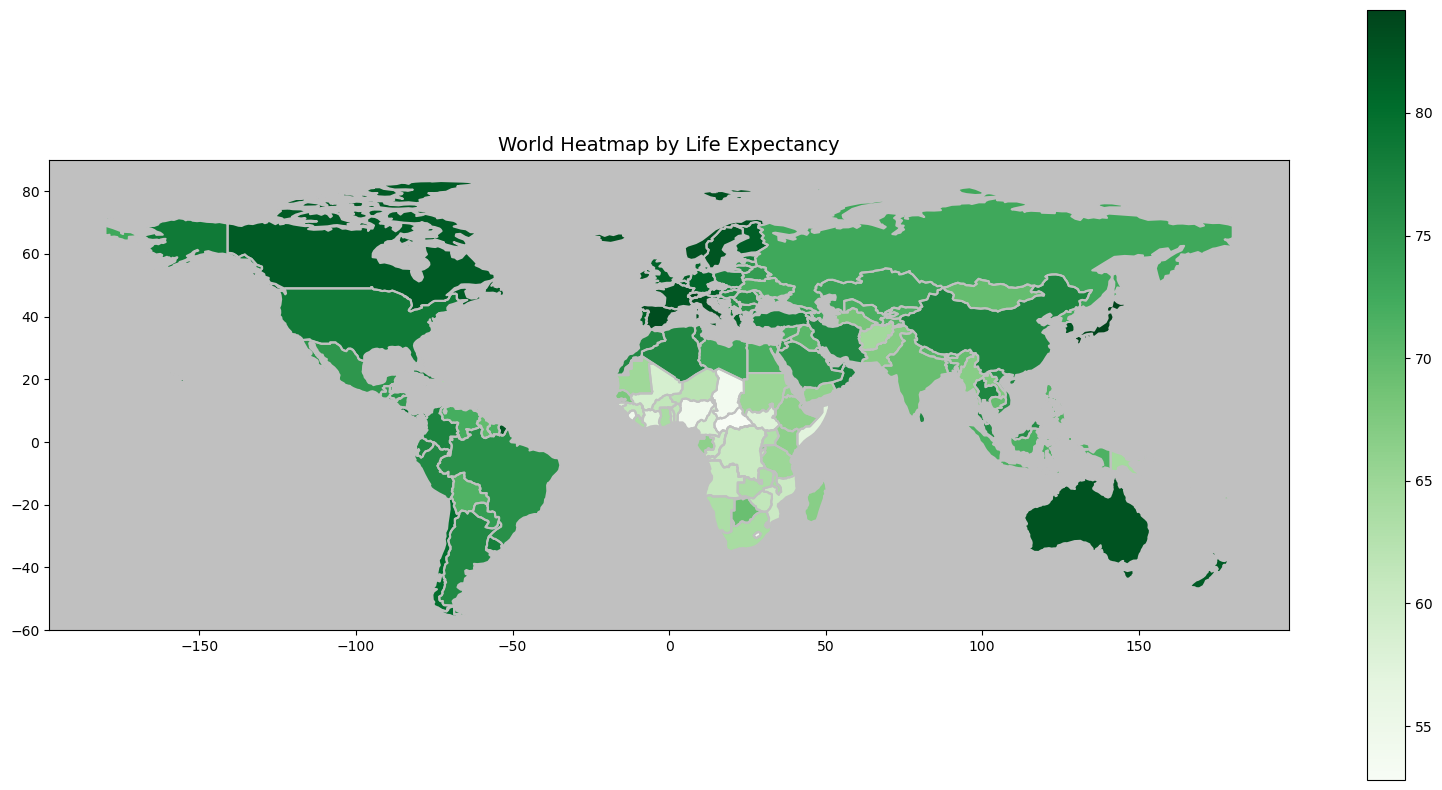

In [72]:
world_map('life_expectancy','Life Expectancy','Greens')

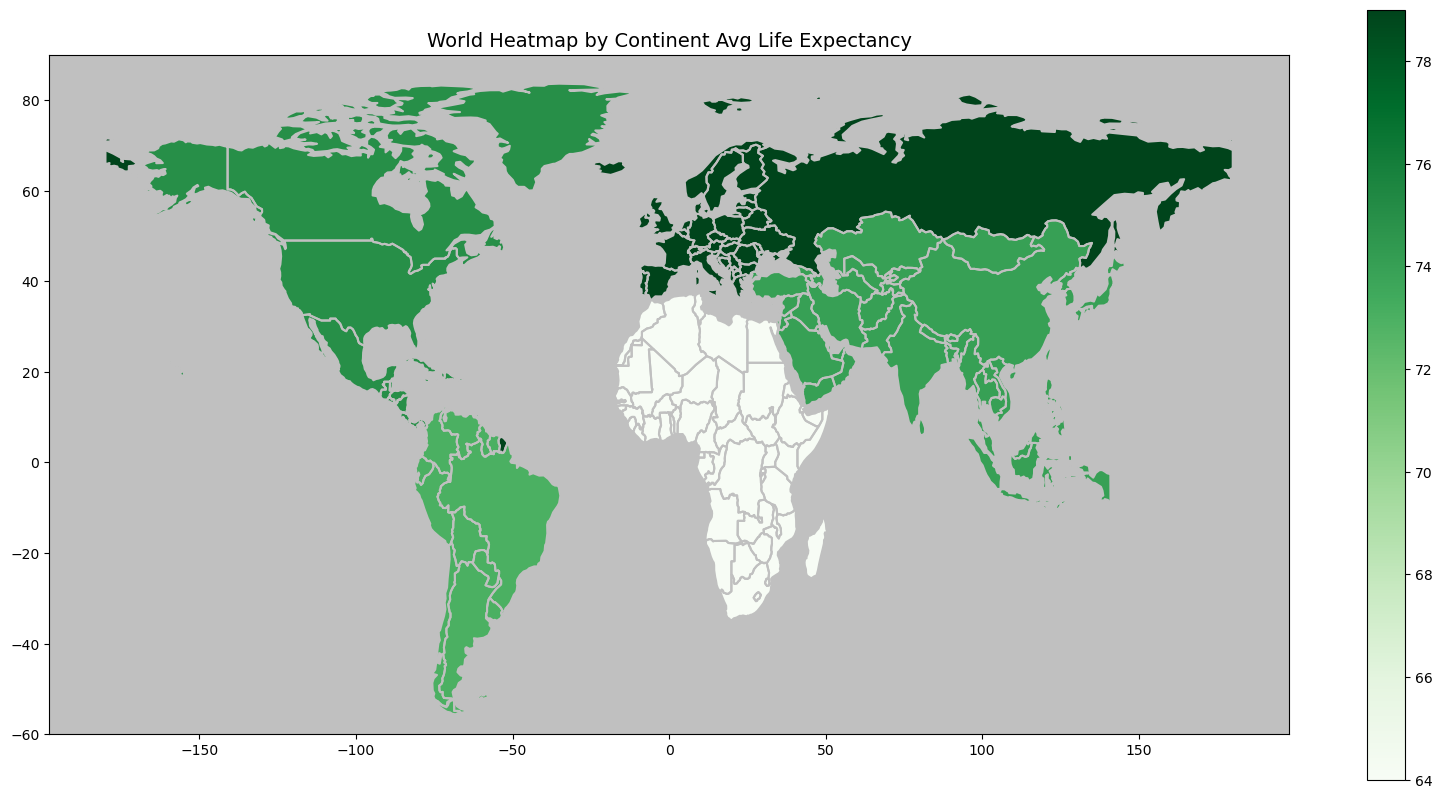

In [73]:
continent_map('life_expectancy','Life Expectancy','Greens',group_continent('life_expectancy',0))

--
## Do certain areas of the world have better healthcare access?


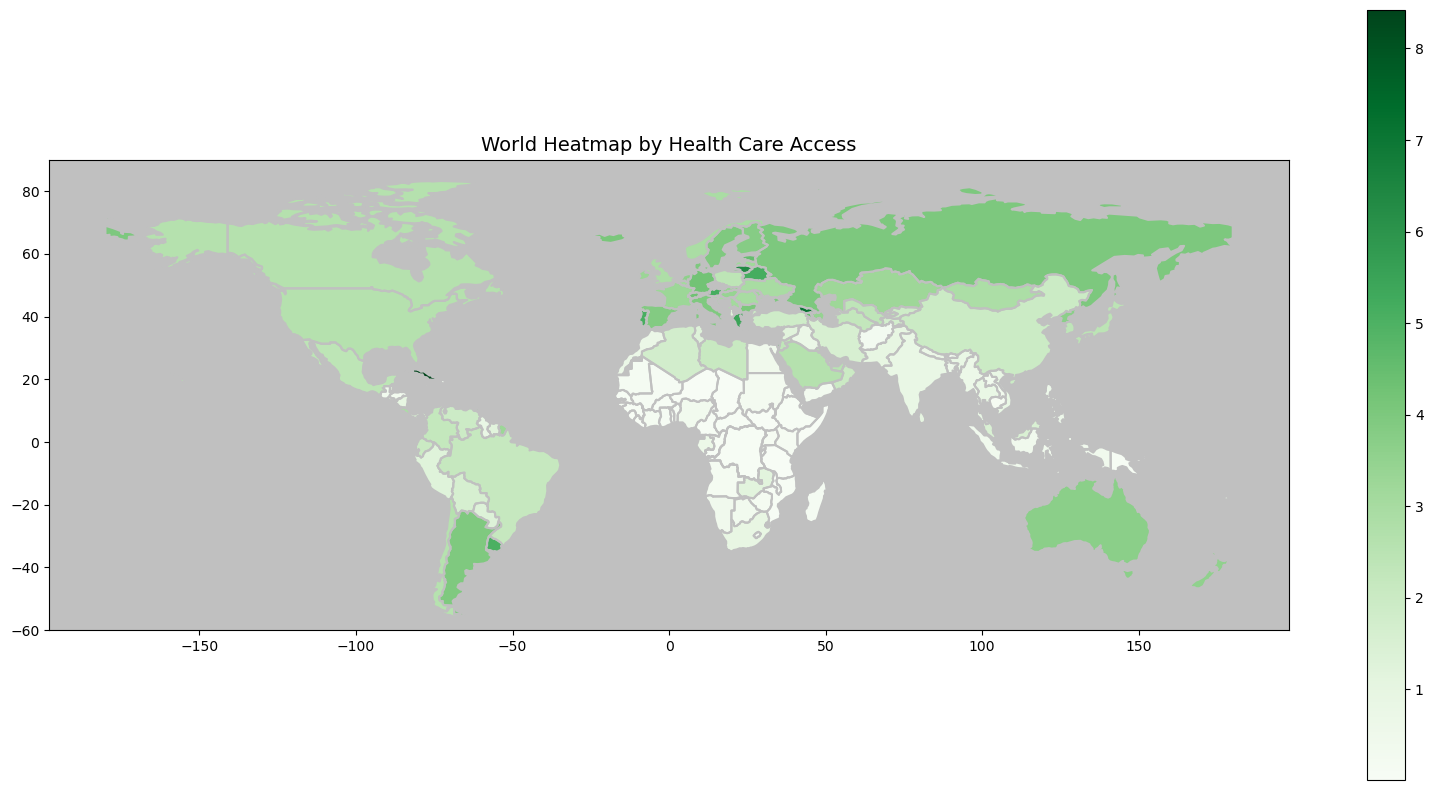

In [75]:
world_map('physicians_per_thousand','Health Care Access','Greens')

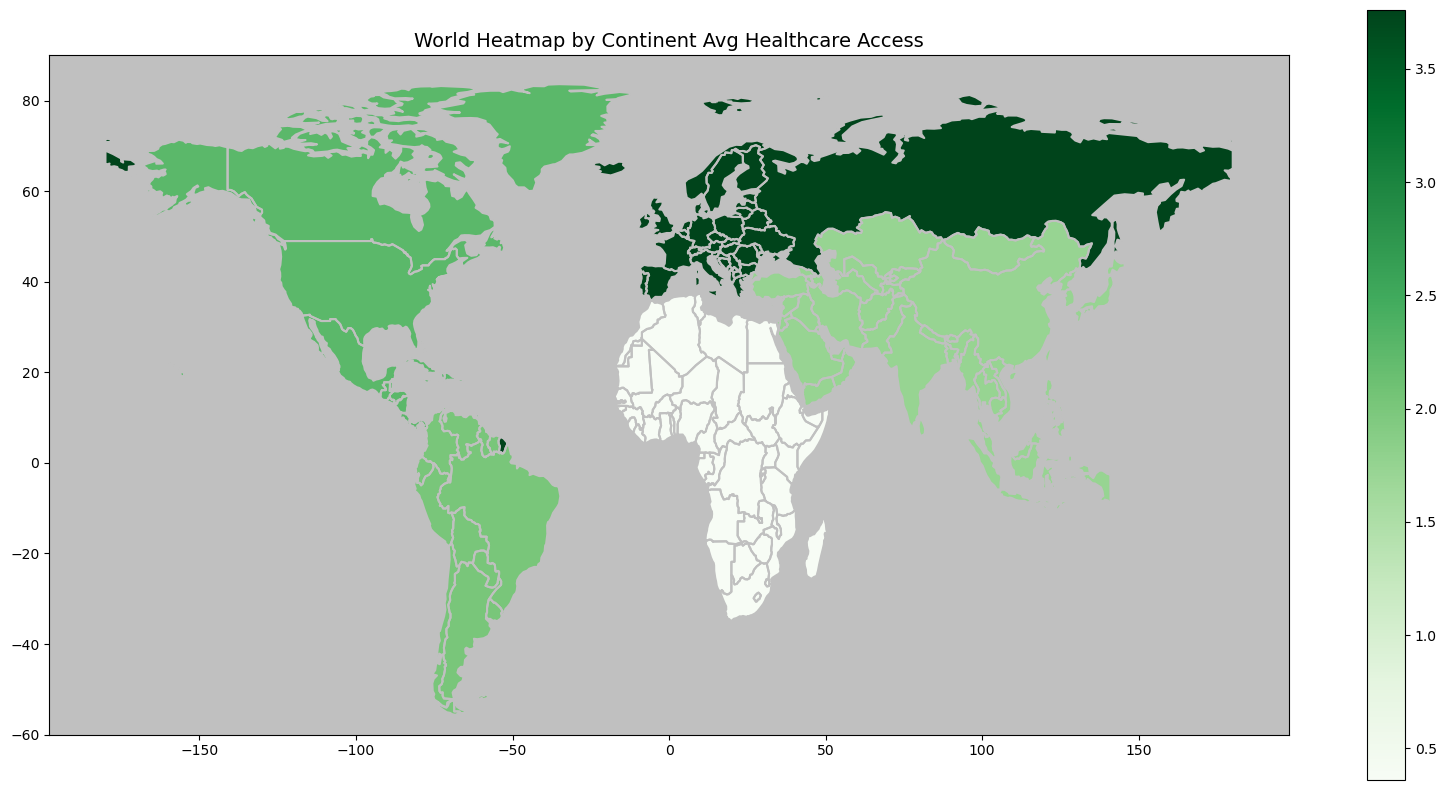

In [76]:
continent_map('physicians_per_thousand','Healthcare Access','Greens',group_continent('physicians_per_thousand',2))

---
## Were certain areas of the world impacted by covid-19 more than others?

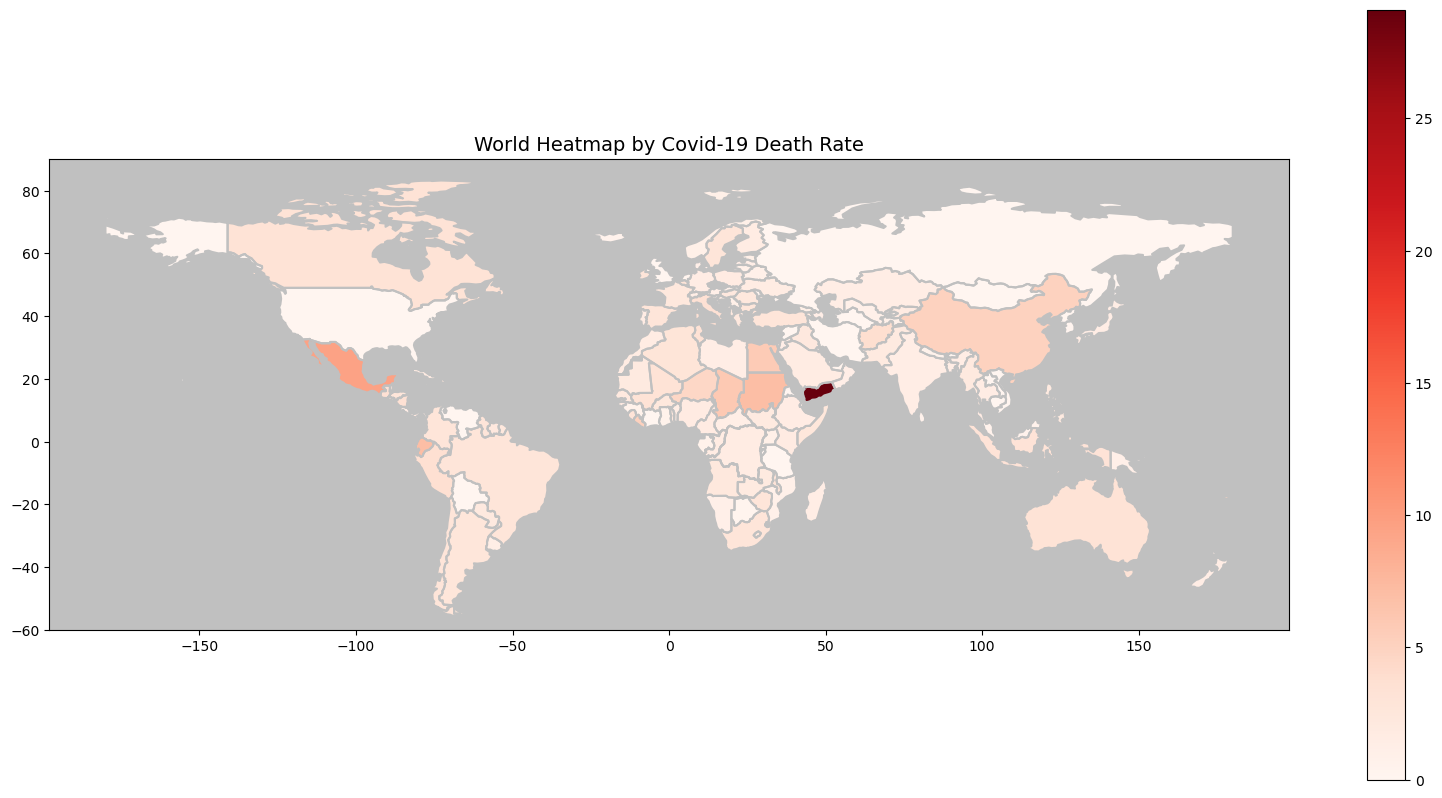

In [133]:
world_map('covid_death_rt','Covid-19 Death Rate','Reds')

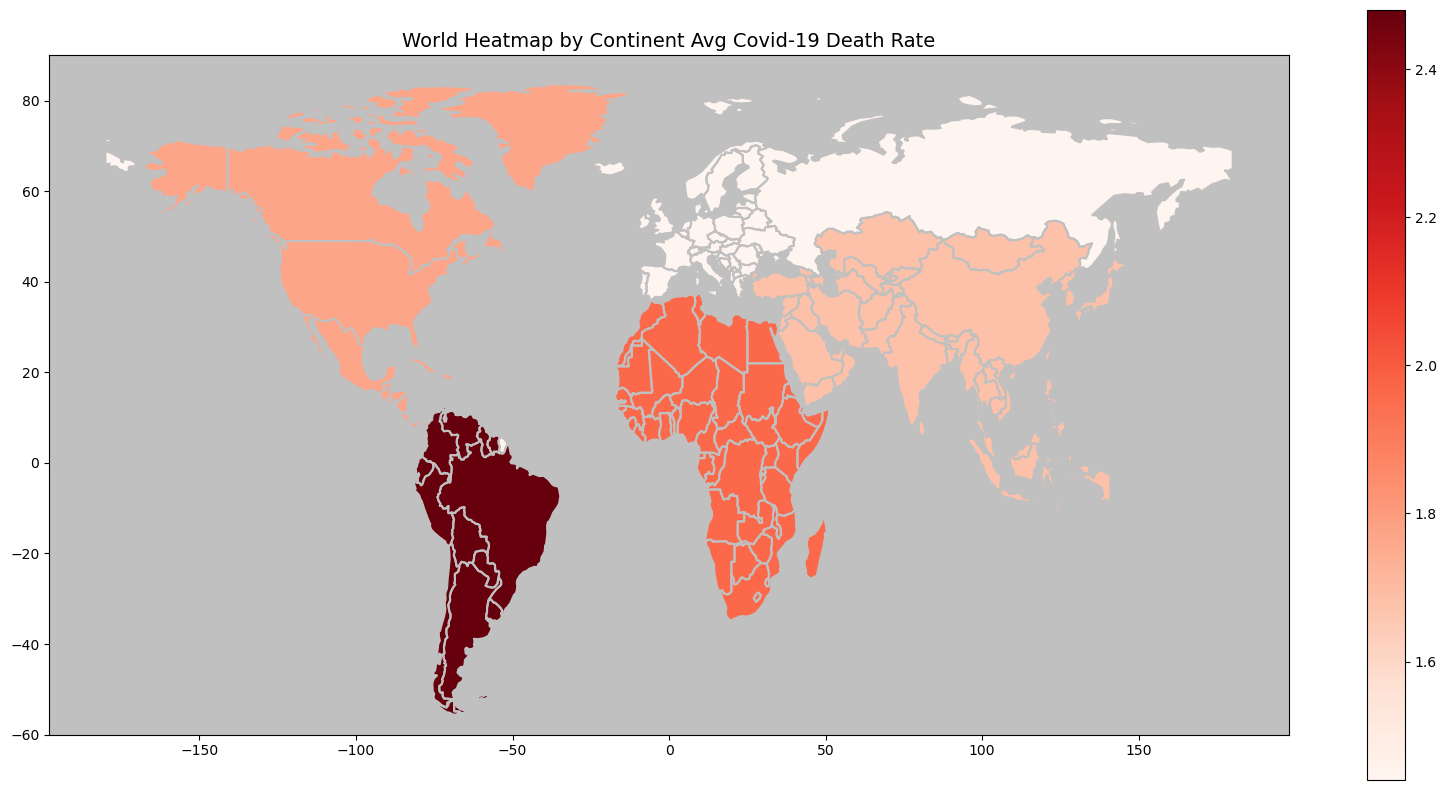

In [135]:
continent_map('covid_death_rt','Covid-19 Death Rate','Reds',group_continent('covid_death_rt',2))

---

# End of Analysis